In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
import re
import requests
import numpy as np
%matplotlib inline

In [3]:
"""
Plot a time series of year vs the number of articles obtained.

Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages of 

Obtain the top 10 universities and research centers based on number of citations.

Obtain the top 10% of countries that provide the most number of research. You can do 
this based on the categories already set in place.

Create a 2D area graph that shows how the percentage of each of the topics increases
over time. See Fig 3 from reference for guidance.

"""

'\nPlot a time series of year vs the number of articles obtained.\n\nPlot number of country of origin (from affiliations) vs number of publications (we might\nbe able to create a map of the world that shows the percentages of \n\nObtain the top 10 universities and research centers based on number of citations.\n\nObtain the top 10% of countries that provide the most number of research. You can do \nthis based on the categories already set in place.\n\nCreate a 2D area graph that shows how the percentage of each of the topics increases\nover time. See Fig 3 from reference for guidance.\n\n'

In [2]:
found_bw = pd.read_csv(os.getcwd() + '/found_buzzwords_final.csv')


In [3]:
found_bw.groupby('subword').count().sort_values('index', ascending = False).head(50)

,index,doi,buzz_id,category,count
subword,,,,,
simulation,12889,12889,12889,12889,12889
regression,7790,7790,7790,7790,7790
classification,5797,5797,5797,5797,5797
statistical analysis,4407,4407,4407,4407,4407
water management,4304,4304,4304,4304,4304
model parameters,3797,3797,3797,3797,3797
risk assessment,3294,3294,3294,3294,3294
data analysis,3157,3157,3157,3157,3157
model results,2547,2547,2547,2547,2547


In [47]:
buzz_encoding = pd.DataFrame(columns = range(29))

In [48]:
for i in list(set(found_bw['index'].tolist())):
    print(i)
    tmp = found_bw[found_bw['index']==i]
    
    grouped = tmp.groupby('buzz_id').sum()
    
    app = [0] * 29
    
    for index in grouped.index.tolist():
        app[index] = grouped.loc[index]['count']
        
    buzz_encoding.loc[len(buzz_encoding.index.tolist())] = app

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
60
61
62
63
64
65
66
67
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
259
260
261
262
263
264
265
266
267
268
269
270
271
273
274
275
276
277
278
279
280
281
282
283

1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166


3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3819
3820
3821
3822
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877


5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5428
5429
5430
5431
5432
5433
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5490
5491
5492
5493
5494
5495
5496
5497
5498
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570


7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276


8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8796
8797
8798
8799
8800
8801
8802
8803
8804
8807
8808
8809
8810
8811
8813
8814
8815
8816
8817
8818
8819
8821
8822
8823
8824
8825
8826
8828
8829
8830
8831
8832
8833
8834
8835
8837
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972


10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10450
10451
10453
10454
10455
10456
10457
10458
10459
10460
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
1056

11836
11838
11839
11840
11841
11842
11843
11844
11845
11847
11848
11849
11850
11851
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12001
12002
12003
12004
12005
12006
12007
12008
12009
1201

13384
13385
13386
13387
13388
13389
13391
13392
13393
13394
13395
13396
13397
13398
13400
13401
13402
13404
13405
13407
13409
13411
13412
13413
13414
13415
13416
13417
13418
13419
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13459
13460
13461
13462
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13481
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13515
13516
13517
13518
13519
13520
13521
13522
13523
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13558
13559
13560
13562
13563
13564
13565
13566
13567
1356

14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14997
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15012
15013
15014
15015
15016
15018
15019
15020
15021
15022
15024
15025
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15051
15052
15054
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15072
15073
15074
15075
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15089
15090
15091
15092
15093
15095
15096
15097
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15115
15118
15119
15120
15121
15122
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15152
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
1516

16488
16489
16490
16492
16493
16495
16496
16497
16498
16499
16500
16501
16502
16503
16504
16505
16506
16507
16508
16509
16510
16511
16512
16513
16514
16515
16516
16517
16518
16519
16520
16521
16522
16523
16524
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16587
16588
16589
16590
16591
16592
16593
16594
16595
16597
16598
16599
16600
16601
16602
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16631
16632
16633
16634
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
16646
16647
16648
16649
16650
16651
16653
16654
16655
16656
16658
16659
16660
16661
16662
16663
16664
16665
1666

18040
18042
18043
18044
18045
18046
18047
18048
18049
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18083
18084
18085
18086
18087
18088
18089
18090
18091
18093
18094
18095
18096
18097
18098
18100
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18114
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18154
18155
18156
18157
18159
18160
18161
18162
18163
18164
18165
18167
18168
18169
18170
18171
18172
18173
18174
18175
18177
18178
18180
18183
18184
18185
18186
18188
18189
18190
18191
18192
18193
18194
18195
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18213
18214
18215
18217
18218
18220
18221
18222
18223
18224
18225
18227
18228
18229
18230
1823

19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19629
19631
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19678
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19715
19716
19717
19718
19719
19720
19721
19723
19724
19725
19726
19727
19728
19730
19731
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19755
19756
19757
19758
19759
19760
19762
19763
19764
19766
19767
19768
19769
19770
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19783
19784
19785
19786
19787
19789
19790
19791
19792
19793
19794
19795
19796
19798
19799
19800
19801
19802
19803
19804
19805
19806
1980

21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21133
21134
21135
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21187
21189
21190
21191
21192
21193
21194
21195
21196
21197
21199
21200
21201
21202
21203
21204
21205
21206
21207
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21237
21238
21239
21240
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
2125

22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22798
22799
22800
22801
22802
22803
22804
22805
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22830
22831
22832
22833
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22914
22915
22916
22917
22918
22919
22920
22921
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22940
2294

24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
24311
24312
24313
24314
24315
24316
24317
24318
24319
24320
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24348
24349
24350
24351
24352
24353
24354
24355
24356
24357
24358
24359
24360
24361
24362
24363
24364
24365
24366
24367
24368
24369
24370
24371
24372
24373
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
2439

25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25723
25724
25725
25726
25727
25728
25729
25730
25731
25732
25733
25734
25735
25736
25737
25738
25739
25740
25741
25742
25743
25744
25745
25746
25747
25748
25749
25750
25751
25752
25753
25754
25755
25756
25757
25758
25759
25760
25761
25762
25763
25764
25765
25766
25767
25768
25769
25770
25771
25772
25773
25774
25775
25776
25777
25778
25779
25780
25781
25782
25783
25784
25785
25786
25787
25788
25789
25790
25791
25792
25793
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25811
25812
25813
25814
25815
25816
25817
2581

In [29]:
len(set(list(found_bw['index'])))

24743

In [2]:
buzz_encoding = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/buzzword_encoding.csv')



In [3]:
buzz_encoding


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,47,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,24737,4,0,0,0,0,1,0,15,0,...,0,0,0,1,0,0,0,0,0,0
9998,24738,5,0,0,0,0,0,0,31,0,...,0,0,0,5,0,0,0,0,0,1
9999,24740,0,0,0,0,0,3,0,18,0,...,3,0,0,0,0,0,0,0,0,11
10000,24741,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_enc = pd.DataFrame(columns = buzz_encoding.columns.tolist())

In [53]:
for i in range(buzz_encoding.shape[0]):
    if buzz_encoding['index'].tolist()[i] in set(papers['Unnamed: 0'].tolist()):
        found.loc[len(found.index)] = new_found.loc[i].tolist()

KeyError: 'index'

In [4]:
dropped = pd.DataFrame(columns = buzz_encoding.columns)

In [17]:
to_drop = []

In [5]:
for i in buzz_encoding.index.tolist():
    d = True
    for j in range(1,30):
        if buzz_encoding.loc[i][j] >= 5 | buzz_encoding.loc[i][1:].astype(bool).sum() > 1:
            d = False
    if not d:
        dropped.loc[len(dropped.index)] = buzz_encoding.loc[i]

In [6]:
dropped

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,47,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,24737,4,0,0,0,0,1,0,15,0,...,0,0,0,1,0,0,0,0,0,0
9817,24738,5,0,0,0,0,0,0,31,0,...,0,0,0,5,0,0,0,0,0,1
9818,24740,0,0,0,0,0,3,0,18,0,...,3,0,0,0,0,0,0,0,0,11
9819,24741,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
dropped[dropped['13'] >0]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
116,212,0,0,0,0,0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,0
157,283,0,0,0,0,0,0,0,29,0,...,0,0,0,0,0,0,0,0,0,0
163,297,19,1,0,0,0,0,0,3,0,...,0,1,0,0,0,0,0,0,0,0
216,380,0,0,0,0,0,0,0,23,0,...,0,0,0,0,0,0,0,0,0,0
230,409,2,0,0,0,0,0,0,44,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,24602,7,0,0,0,0,0,0,23,0,...,0,0,0,0,0,0,0,0,1,0
9714,24610,0,0,0,0,0,0,0,8,0,...,1,0,0,3,0,0,0,0,0,0
9722,24620,1,3,0,0,0,0,0,81,0,...,0,0,0,3,0,0,0,0,1,15
9739,24638,2,2,0,0,0,0,3,5,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
dropped['doi'] = [papers.iat[i,4] for i in dropped['Unnamed: 0'].tolist()]

In [85]:
dropped

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,doi
0,0,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104474
1,1,0,0,0,0,0,0,0,22,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104475
2,3,0,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104477
3,4,1,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104485
4,5,0,0,0,0,0,0,0,47,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.advwatres.2023.104441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,24737,4,0,0,0,0,1,0,15,0,...,0,0,1,0,0,0,0,0,0,10.1016/j.ecolmodel.2020.109280
9817,24738,5,0,0,0,0,0,0,31,0,...,0,0,5,0,0,0,0,0,1,10.1016/j.ecolmodel.2020.109286
9818,24740,0,0,0,0,0,3,0,18,0,...,0,0,0,0,0,0,0,0,11,10.1016/j.ecolmodel.2020.109295
9819,24741,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,10.1016/j.ecolmodel.2020.109292


In [82]:
papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/papers/final_valid_papers.csv')

In [83]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104476,2023-08-01,S0309170823001112,2-s2.0-85161667219,8.516167e+10,0.0,25822520800,60025063,True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.020,2018-01-01,S1364815217304140,2-s2.0-85032268729,8.503227e+10,142.0,"34571084000, 55188785600, 33767605600, 5721638...","60016437:60012197:60012197:60012197, 60025278:...",True
26470,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.010,2018-01-01,S1364815216304005,2-s2.0-85032353211,8.503235e+10,54.0,"37111876100, 15069126500, 57189996027, 3574567...","60013141:60025182:60025182:60025182:60013141, ...",True
26471,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.08.002,2018-01-01,S1364815216309550,2-s2.0-85032684995,8.503268e+10,5.0,"7006615627, 49661600900, 15132591800, 66033150...","60021439:60030486, 109682148:60021439:60021439...",True
26472,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.011,2018-01-01,S136481521630843X,2-s2.0-85032736133,8.503274e+10,45.0,"56111768300, 37010006200, 43361846100, 5611302...",60068861:60020071:60068861:60024695:60102538:6...,True


In [86]:
dropped.to_csv(os.getcwd().replace('scripts', 'data') + '/buzzword_encoding_step2.csv', index = False)


In [33]:
to_drop

[0,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 34,
 35,
 36,
 38,
 39,
 41,
 44,
 45,
 46,
 48,
 49,
 50,
 55,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 76,
 77,
 78,
 81,
 86,
 89,
 91,
 92,
 94,
 95,
 97,
 99,
 100,
 101,
 102,
 103,
 106,
 107,
 108,
 109,
 110,
 111,
 113,
 116,
 117,
 118,
 120,
 121,
 124,
 125,
 126,
 127,
 131,
 132,
 133,
 135,
 137,
 138,
 139,
 141,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 154,
 155,
 156,
 157,
 159,
 160,
 161,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 181,
 183,
 184,
 185,
 186,
 187,
 190,
 192,
 193,
 195,
 199,
 200,
 202,
 203,
 204,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 221,
 222,
 223,
 224,
 227,
 228,
 229,
 232,
 233,
 234,
 235,
 237,
 238,
 239,
 240,
 241,
 242,
 244,
 247,
 248,
 250,
 251,
 253,
 254,
 256,
 257,
 260,
 261,

In [34]:
orig = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/papers/final_valid_papers.csv')

In [63]:
orig.loc[dropped.index.tolist()].to_csv(os.getcwd().replace('scripts', 'data') + '/corpus_papers.csv')


In [55]:
dropped.to_csv(os.getcwd().replace('scripts', 'data') + '/buzzword_encoding.csv', index = False)


In [84]:
papers

,Unnamed: 0,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
3,4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
4,5,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104441,2023-08-01,S0309170823000763,2-s2.0-85161836812,8.516184e+10,0.0,"57886962200, 36559092800",60010065:60010065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,24737,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109280,2020-11-15,S0304380020303501,2-s2.0-85090927013,8.509093e+10,3.0,"23024388700, 7101905813, 35361990500, 66029039...",60017028:60113653:125122077:60084653:60000961,True
9998,24738,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109286,2020-11-15,S0304380020303562,2-s2.0-85090881697,8.509088e+10,7.0,"57205669891, 35721643400, 36972298000, 3533988...",60050715:60050715:60050715:60050715,True
9999,24740,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109295,2020-11-15,S0304380020303653,2-s2.0-85091224515,8.509122e+10,4.0,"37032101300, 57219093332, 56024528100, 7003432534",60019762:60019839:60019839:60019839,True
10000,24741,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109292,2020-11-15,S0304380020303628,2-s2.0-85091625576,8.509163e+10,14.0,"57207691368, 6603286088, 7501733919, 266652024...","60007566:60007566:119214231:60007566, 60007566...",True


In [80]:
found = pd.DataFrame(columns = found.columns.tolist())

In [81]:
for i in range(new_found.shape[0]):
    if new_found['index'].tolist()[i] in set(papers['Unnamed: 0'].tolist()):
        found.loc[len(found.index)] = new_found.loc[i].tolist()

In [82]:
found

,index,doi,buzz_id,category,subword,count
0,0,10.1016/j.advwatres.2023.104474,7,Modeling,simulation,24
1,0,10.1016/j.advwatres.2023.104474,7,Modeling,model validation,1
2,1,10.1016/j.advwatres.2023.104475,7,Modeling,simulation,21
3,1,10.1016/j.advwatres.2023.104475,7,Modeling,model parameters,1
4,1,10.1016/j.advwatres.2023.104475,14,Nanotechnology,nanoparticle,102
...,...,...,...,...,...,...
45594,24742,10.1016/j.ecolmodel.2020.109288,0,AI and Machine Learning,classification,2
45595,24742,10.1016/j.ecolmodel.2020.109288,0,AI and Machine Learning,regression,1
45596,24742,10.1016/j.ecolmodel.2020.109288,7,Modeling,model validation,1
45597,24742,10.1016/j.ecolmodel.2020.109288,7,Modeling,model assumptions,3


In [83]:
len(set(found['index'].tolist()))

9358

In [73]:
len(set(papers['Unnamed: 0'].tolist()))

10002

In [70]:
journals = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/journals.csv')
papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/corpus_papers.csv')
affiliations = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/affiliations/affiliations_metadata.csv')
kwords = pd.read_csv(os.getcwd().replace('scripts', 'data')+'/technical_buzzwords.csv')
words = pd.DataFrame(columns = ['topic', 'keywords'])
for i in range(kwords.shape[0]):
    words.loc[len(words.index)] = [kwords.iat[i,0], kwords.iat[i,1].split(", ")]
    
buzz_counts = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/buzzword_encoding.csv')

# occur_per_topic = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/occurrences_per_topic.csv')

buzzwords_in_papers = pd.read_csv(os.getcwd() + '/found_buzzwords_final.csv')

# contexts_papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/full_text/paper_contexts.csv')



    


In [43]:
kwords = pd.read_csv(os.getcwd().replace('scripts', 'data')+'/technical_buzzwords.csv')
words = pd.DataFrame(columns = ['topic', 'keywords'])
for i in range(kwords.shape[0]):
    words.loc[len(words.index)] = [kwords.iat[i,0], kwords.iat[i,1].split(", ")]

In [45]:
buzz_counts

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,4,0,0,0,0,1,0,15,0,0,...,0,0,0,1,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
9999,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11
10000,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
buzzwords_in_papers

,index,doi,buzz_id,category,subword,count
0,0,10.1016/j.advwatres.2023.104474,7,Modeling,modeling,8
1,0,10.1016/j.advwatres.2023.104474,7,Modeling,simulation,24
2,0,10.1016/j.advwatres.2023.104474,7,Modeling,model validation,1
3,1,10.1016/j.advwatres.2023.104475,2,Blockchain and Cryptocurrency,block,2
4,1,10.1016/j.advwatres.2023.104475,7,Modeling,modeling,2
...,...,...,...,...,...,...
179752,25851,10.1016/j.envsoft.2017.09.002,7,Modeling,model development,3
179753,25851,10.1016/j.envsoft.2017.09.002,7,Modeling,model complexity,1
179754,25851,10.1016/j.envsoft.2017.09.002,29,Web Applications,user interface,2
179755,25851,10.1016/j.envsoft.2017.09.002,29,Web Applications,application programming interface,1


In [16]:
df = buzzwords_in_papers.groupby('subword').count().sort_values('index').tail(50)

In [17]:
df

,index,doi,buzz_id,category,count
subword,,,,,
model accuracy,861,861,861,861,861
superposition,891,891,891,891,891
user interface,938,938,938,938,938
post processing,940,940,940,940,940
containers,943,943,943,943,943
control system,951,951,951,951,951
random forest,954,954,954,954,954
overfitting,987,987,987,987,987
throughput,994,994,994,994,994


In [10]:
words

,topic,keywords
0,AI and Machine Learning,"[Artificial Intelligence, Machine Learning, Su..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain and Cryptocurrency,"[Blockchain, Cryptocurrency, Bitcoin, Ethereum..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,AR and VR,"[Augmented Reality, Virtual Reality, Mixed Rea..."
5,Cybersecurity,"[Cybersecurity, Ethical Hacking, Intrusion Det..."
6,Automation,"[Automation, Industrial Automation, Home Autom..."
7,Modeling,"[Modeling, Modelling, ArcGIS, HEC-RAS, MIKE, F..."
8,NLP,"[NLP, Natural Language Processing, Sentiment A..."
9,Quantum Computing,"[Quantum Computing, Quantum Algorithm, Quantum..."


In [18]:
df['topic'] = [buzzwords_in_papers[buzzwords_in_papers['subword'] == word].iat[0,3] for word in df.index.tolist()]



In [19]:
df

,index,doi,buzz_id,category,count,topic
subword,,,,,,
model accuracy,861,861,861,861,861,Modeling
superposition,891,891,891,891,891,Quantum Computing
user interface,938,938,938,938,938,AR and VR
post processing,940,940,940,940,940,3D Printing
containers,943,943,943,943,943,Software/Platform/Infrastructure as a Service
control system,951,951,951,951,951,Automation
random forest,954,954,954,954,954,AI and Machine Learning
overfitting,987,987,987,987,987,Data Mining
throughput,994,994,994,994,994,5G


In [4]:
for i in range(30):
    print(str(words.iat[i,0]) + " "+str(buzz_counts.iat[25852,i]))

AI and Machine Learning 9152
Big Data 3705
Blockchain and Cryptocurrency 6610
IoT 1650
AR and VR 2136
Cybersecurity 2156
Automation 2575
Modeling 17674
NLP 305
Quantum Computing 1211
5G 2156
Cloud Computing 1402
Edge Computing 200
Data Analytics 6013
Biotechnology 3089
Nanotechnology 2010
Wearable Technology 96
Voice User Interface (VUI) 288
FinTech 12
Data Mining 9275
Predictive Analysis 5525
Chatbots 564
3D Printing 3081
Smart Cities 8065
Regtech 880
Insurtech 1
E-Commerce 83
Serverless Computing 565
Software/Platform/Infrastructure as a Service 2122
Web Applications 11089


In [6]:
buzzwords_in_papers


,index,doi,buzz_id,category,subword,count
0,0,10.1016/j.advwatres.2023.104474,7,Modeling,modeling,8
1,0,10.1016/j.advwatres.2023.104474,7,Modeling,simulation,24
2,0,10.1016/j.advwatres.2023.104474,7,Modeling,model validation,1
3,1,10.1016/j.advwatres.2023.104475,2,Blockchain and Cryptocurrency,block,2
4,1,10.1016/j.advwatres.2023.104475,7,Modeling,modeling,2
...,...,...,...,...,...,...
179752,26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model development,3
179753,26473,10.1016/j.envsoft.2017.09.002,7,Modeling,model complexity,1
179754,26473,10.1016/j.envsoft.2017.09.002,29,Web Applications,user interface,2
179755,26473,10.1016/j.envsoft.2017.09.002,29,Web Applications,application programming interface,1


In [7]:
len(set(buzzwords_in_papers['index'].tolist()))

25852

In [ ]:
j = 0
prev = 0
for i in set(buzzwords_in_papers['index'].tolist()):
    found = False
    for k in range(prev, len(buzzwords_in_papers.index)):
        if(buzzwords_in_papers.iat[k,0]==i):
            found = True
            buzzwords_in_papers.iat[k,0]= j
        else:
            if found:
                prev = i 
                break
    j+=1

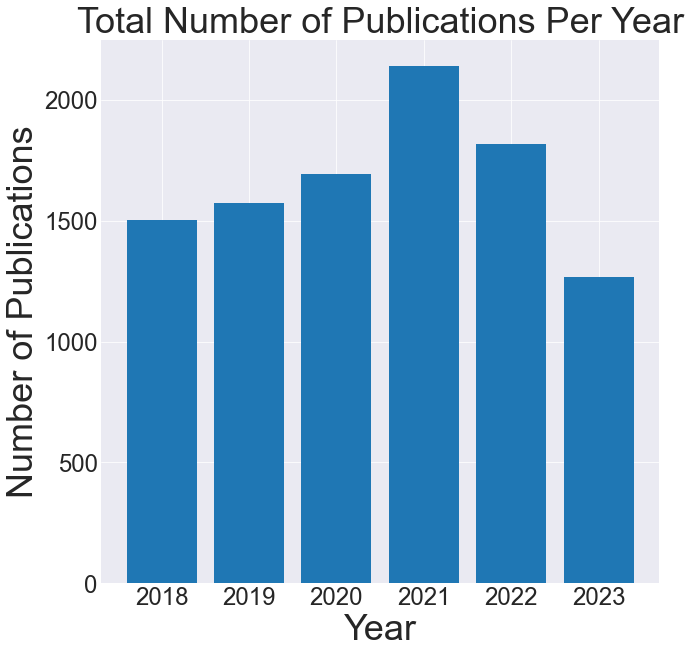

In [128]:
"""
Plot a time series of year vs the number of articles obtained.
"""
plt.figure(figsize = (10,10))
by_year = papers.groupby('year').count()
years = by_year.index.tolist()
cnts = by_year['journal_id'].tolist()
plt.yticks(np.arange(0, 6500, 500), fontsize = 24)
plt.style.use('seaborn-darkgrid')
plt.ylabel("Number of Publications",fontsize = 36)
plt.xlabel("Year", fontsize = 36)
plt.title("Total Number of Publications Per Year",fontsize = 36)
plt.bar(x = years, height = cnts)
plt.xticks(years, fontsize = 24)
plt.savefig('total_pubs_per_yr.png',transparent=True)

In [5]:
affiliations

,aff_id,eid,name,country,author_count,doc-count
0,60031268,10-s2.0-60031268,Daneshgahe Shahid Bahonar-e-Kerman,Iran,3834,14667
1,60007989,10-s2.0-60007989,Universiteit Utrecht,Netherlands,17385,103116
2,60022461,10-s2.0-60022461,Technical University of Crete,Greece,1640,9706
3,60104134,10-s2.0-60104134,Khalifa University of Science and Technology,United Arab Emirates,3159,21236
4,60025063,10-s2.0-60025063,KU Leuven,Belgium,26413,172551
...,...,...,...,...,...,...
12292,60030486,10-s2.0-60030486,"University of Idaho, Idaho Falls",United States,150,874
12293,108119111,10-s2.0-108119111,Health Department,United States,1,7
12294,119716405,10-s2.0-119716405,"A Division of RESPEC, INC",United States,0,3
12295,108152689,10-s2.0-108152689,Primodal Inc.,Canada,0,9


In [6]:
papers


,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104476,2023-08-01,S0309170823001112,2-s2.0-85161667219,8.516167e+10,0.0,25822520800,60025063,True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.020,2018-01-01,S1364815217304140,2-s2.0-85032268729,8.503227e+10,142.0,"34571084000, 55188785600, 33767605600, 5721638...","60016437:60012197:60012197:60012197, 60025278:...",True
26470,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.010,2018-01-01,S1364815216304005,2-s2.0-85032353211,8.503235e+10,54.0,"37111876100, 15069126500, 57189996027, 3574567...","60013141:60025182:60025182:60025182:60013141, ...",True
26471,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.08.002,2018-01-01,S1364815216309550,2-s2.0-85032684995,8.503268e+10,5.0,"7006615627, 49661600900, 15132591800, 66033150...","60021439:60030486, 109682148:60021439:60021439...",True
26472,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.011,2018-01-01,S136481521630843X,2-s2.0-85032736133,8.503274e+10,45.0,"56111768300, 37010006200, 43361846100, 5611302...",60068861:60020071:60068861:60024695:60102538:6...,True


In [91]:
"""Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages"""

countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co] = 1
        else:
            countries[co] +=1

sorted_countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}



In [92]:
pd.DataFrame(columns = ['country', 'publications'], data  = list(sorted_countries.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_pubs.csv', index = False)



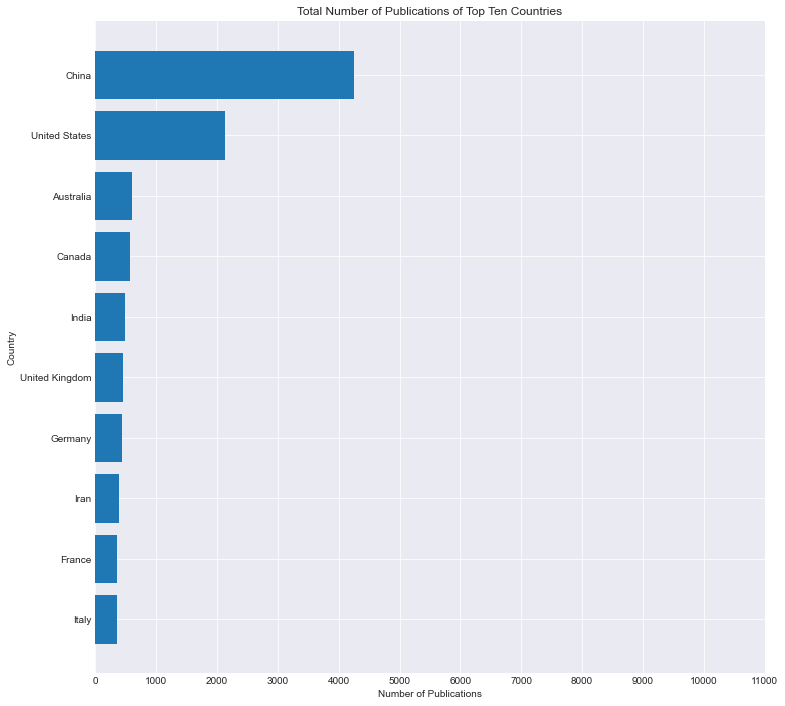

In [100]:
countries = list(sorted_countries.keys())[:10]
pubs = list(sorted_countries.values())[:10]

plt.figure(figsize = (12,12))
plt.barh(countries, pubs)

plt.xticks(np.arange(0, 12000, 1000))
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.title("Total Number of Publications of Top Ten Countries")
plt.ylabel("Country")
plt.xlabel("Number of Publications")
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])
plt.savefig('total_pubs_t10_countries.png',transparent=True)
plt.show()


In [94]:
"""
Obtain the top 10 universities and research centers based on number of citations.
"""
pubs = {}
for i in set(papers.index.tolist()):
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    for aff in set(aff_list):
        if aff not in pubs.keys():
            pubs[aff] = papers.loc[i]['citations']
        else:
            pubs[aff] +=papers.loc[i]['citations']

sorted_aff_pubs = {k: v for k, v in sorted(pubs.items(), key=lambda item: item[1], reverse = True)}



In [95]:
sorted_aff_pubs

{'60027363': 4481.0,
 '60025278': 3857.0,
 '60010851': 3836.0,
 '60019499': 3292.0,
 '60029306': 3158.0,
 '60031041': 3042.0,
 '60073652': 2521.0,
 '60019616': 2463.0,
 '60032356': 2441.0,
 '60017161': 2439.0,
 '60019533': 2433.0,
 '60003353': 2396.0,
 '60021182': 2373.0,
 '60023237': 2333.0,
 '60020547': 2297.0,
 '60004538': 2100.0,
 '60025084': 2094.0,
 '60010689': 1981.0,
 '60006019': 1976.0,
 '60005488': 1909.0,
 '60029322': 1898.0,
 '60012708': 1817.0,
 '60031150': 1767.0,
 '60033100': 1764.0,
 '60022422': 1747.0,
 '60004156': 1682.0,
 '60025761': 1634.0,
 '60013551': 1615.0,
 '60028333': 1594.0,
 '60004956': 1580.0,
 '60023932': 1454.0,
 '60031004': 1404.0,
 '60027277': 1362.0,
 '60002612': 1345.0,
 '60017456': 1294.0,
 '60123520': 1242.0,
 '60118763': 1178.0,
 '60002092': 1177.0,
 '60087826': 1131.0,
 '60022414': 1097.0,
 '60006288': 1095.0,
 '60022002': 1068.0,
 '60014966': 1063.0,
 '60029616': 1053.0,
 '60026981': 1045.0,
 '60021391': 1029.0,
 '60022927': 1028.0,
 '60025858': 

In [96]:
pd.DataFrame(columns = ['affiliation', 'citations'], data  = list(sorted_aff_pubs.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/affiliation_citations.csv', index = False)




In [97]:
best_affs = list(sorted_aff_pubs.items())[:10]

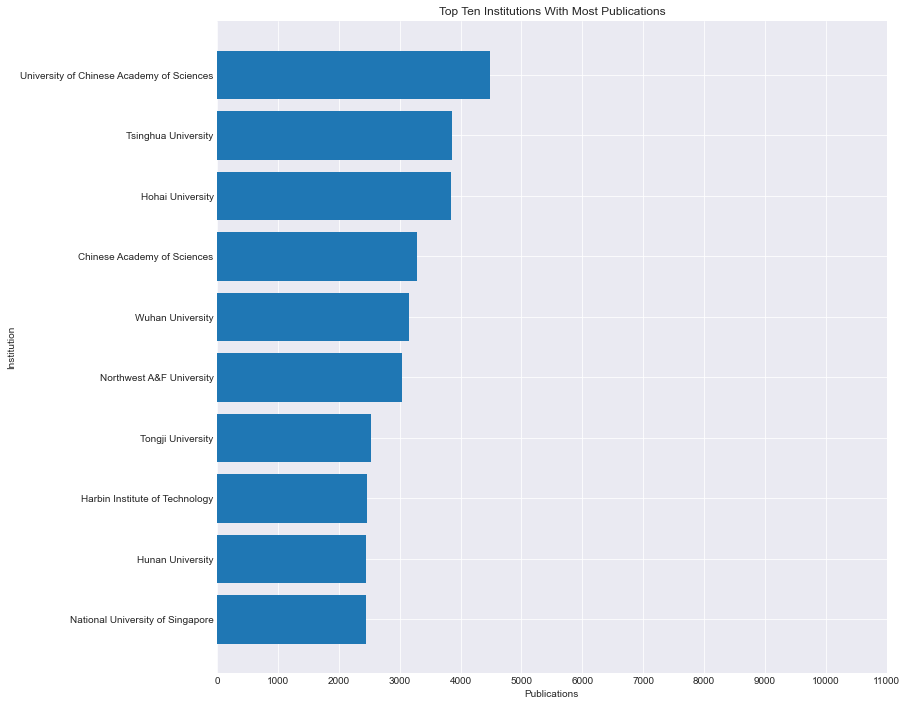

In [99]:
pubs = list(v[1] for v in best_affs)
affils = [affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]

plt.figure(figsize = (12,12))
plt.barh(affils, pubs)

plt.xticks(np.arange(0, 12000, 1000))
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.title("Top Ten Institutions With Most Publications")
plt.ylabel("Institution")
plt.xlabel("Publications")
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])
plt.savefig('total_pubs_t10_affs.png',transparent=True)
plt.show()



In [254]:
[affiliations[affiliations['aff_id']==int(aff[0])].iloc[0,2] for aff in best_affs]

['University of Chinese Academy of Sciences',
 'Tsinghua University',
 'Harbin Institute of Technology',
 'Tongji University',
 'Hohai University',
 'Northwest A&F University',
 'Chinese Academy of Sciences',
 'Wuhan University',
 'Nanjing University',
 'Hunan University']

In [119]:
[affiliations[affiliations['aff_id']==int(aff[0])] for aff in best_affs]

[       aff_id               eid                      name country  \
 275  60031041  10-s2.0-60031041  Northwest A&F University   China   
 
      author_count  doc-count  
 275         27777      47571  ,
       aff_id               eid              name country  author_count  \
 18  60010851  10-s2.0-60010851  Hohai University   China         19513   
 
     doc-count  
 18      58470  ,
       aff_id               eid                                       name  \
 31  60027363  10-s2.0-60027363  University of Chinese Academy of Sciences   
 
    country  author_count  doc-count  
 31   China         79023     296208  ,
       aff_id               eid              name country  author_count  \
 81  60029306  10-s2.0-60029306  Wuhan University   China         53311   
 
     doc-count  
 81     157339  ,
        aff_id               eid                           name country  \
 330  60013551  10-s2.0-60013551  China Agricultural University   China   
 
      author_count  doc-count 

In [17]:
"""
Obtain the top 10% of countries that provide the most number of research. You can do 
this based on the categories already set in place.contry vs.citations
"""

'\nObtain the top 10% of countries that provide the most number of research. You can do \nthis based on the categories already set in place.\n\n'

In [101]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104476,2023-08-01,S0309170823001112,2-s2.0-85161667219,8.516167e+10,0.0,25822520800,60025063,True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.020,2018-01-01,S1364815217304140,2-s2.0-85032268729,8.503227e+10,142.0,"34571084000, 55188785600, 33767605600, 5721638...","60016437:60012197:60012197:60012197, 60025278:...",True
26470,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.010,2018-01-01,S1364815216304005,2-s2.0-85032353211,8.503235e+10,54.0,"37111876100, 15069126500, 57189996027, 3574567...","60013141:60025182:60025182:60025182:60013141, ...",True
26471,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.08.002,2018-01-01,S1364815216309550,2-s2.0-85032684995,8.503268e+10,5.0,"7006615627, 49661600900, 15132591800, 66033150...","60021439:60030486, 109682148:60021439:60021439...",True
26472,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.011,2018-01-01,S136481521630843X,2-s2.0-85032736133,8.503274e+10,45.0,"56111768300, 37010006200, 43361846100, 5611302...",60068861:60020071:60068861:60024695:60102538:6...,True


In [101]:
countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co]=0
        
        countries[co]+=papers.iloc[i,9]

In [20]:
countries

{'Iran': 18123.0,
 'Netherlands': 18363.0,
 'United Arab Emirates': 2248.0,
 'Greece': 2311.0,
 'Belgium': 5762.0,
 'United States': 93584.0,
 'Canada': 21929.0,
 'China': 201343.0,
 'Poland': 3808.0,
 'Switzerland': 9127.0,
 'Australia': 34034.0,
 'Italy': 16605.0,
 'Denmark': 6443.0,
 'France': 12598.0,
 'Germany': 22272.0,
 'Taiwan': 4795.0,
 'Japan': 9914.0,
 'Spain': 14035.0,
 'South Korea': 13805.0,
 'Ghana': 1014.0,
 'India': 24267.0,
 'Russian Federation': 1527.0,
 'Oman': 1005.0,
 'Austria': 4179.0,
 'Morocco': 1263.0,
 'United Kingdom': 19590.0,
 'Sweden': 6906.0,
 'Brazil': 8097.0,
 'Singapore': 11458.0,
 'Norway': 6990.0,
 'Indonesia': 1238.0,
 'Finland': 3868.0,
 'New Zealand': 3715.0,
 'Nepal': 636.0,
 'Saudi Arabia': 3764.0,
 'Israel': 2996.0,
 'Luxembourg': 379.0,
 'Mexico': 2122.0,
 'Colombia': 993.0,
 'Democratic Republic Congo': 60.0,
 'South Africa': 3032.0,
 'Argentina': 1318.0,
 'Lebanon': 433.0,
 'Egypt': 4435.0,
 'Qatar': 1587.0,
 'Hong Kong': 8146.0,
 'Banglade

In [102]:
sorted_countries_citations = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}


In [103]:
pd.DataFrame(columns = ['country', 'citations'], data  = list(sorted_countries_citations.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_citations.csv', index = False)



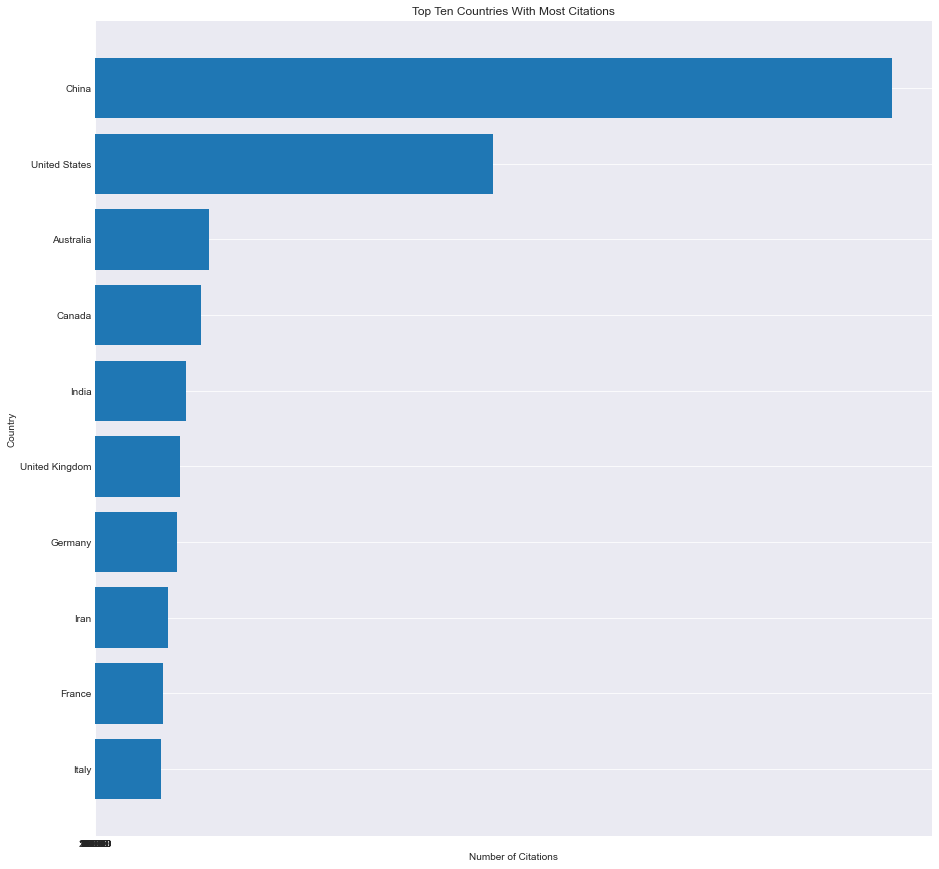

In [104]:
cits = list(sorted_countries_citations.values())[:10]
counts = list(sorted_countries_citations.keys())[:10]

plt.figure(figsize = (15,15))
plt.barh(counts, cits)

plt.xticks(np.arange(0, 210000, 10000))
plt.style.use('seaborn-darkgrid')
plt.gca().invert_yaxis()
plt.ylabel("Country")
plt.xlabel("Number of Citations")
plt.title("Top Ten Countries With Most Citations")
plt.savefig('total_cits_t10_countries.png',transparent=True)
# plt.yscale('log')
# plt.yticks(ticks = [1,30,75,750,3000,7500,30000,75000], labels = [1,30,75,750,3000,7500,30000,75000])

plt.show()

In [23]:
sorted_countries_citations


{'China': 201343.0,
 'United States': 93584.0,
 'Australia': 34034.0,
 'India': 24267.0,
 'Germany': 22272.0,
 'Canada': 21929.0,
 'United Kingdom': 19590.0,
 'Netherlands': 18363.0,
 'Iran': 18123.0,
 'Italy': 16605.0,
 'Spain': 14035.0,
 'South Korea': 13805.0,
 'France': 12598.0,
 'Singapore': 11458.0,
 'Japan': 9914.0,
 'Switzerland': 9127.0,
 'Hong Kong': 8146.0,
 'Brazil': 8097.0,
 'Norway': 6990.0,
 'Turkey': 6914.0,
 'Sweden': 6906.0,
 'Portugal': 6843.0,
 'Denmark': 6443.0,
 'Viet Nam': 5813.0,
 'Belgium': 5762.0,
 'Malaysia': 5418.0,
 'Taiwan': 4795.0,
 'Egypt': 4435.0,
 'Austria': 4179.0,
 'Finland': 3868.0,
 'Poland': 3808.0,
 'Saudi Arabia': 3764.0,
 'Pakistan': 3760.0,
 'New Zealand': 3715.0,
 'South Africa': 3032.0,
 'Israel': 2996.0,
 'Bangladesh': 2401.0,
 'Greece': 2311.0,
 'United Arab Emirates': 2248.0,
 'Mexico': 2122.0,
 'Ireland': 1966.0,
 'Czech Republic': 1929.0,
 'Ethiopia': 1838.0,
 'Cyprus': 1684.0,
 'Thailand': 1659.0,
 'Nigeria': 1596.0,
 'Qatar': 1587.0,


In [114]:
affiliations

,aff_id,eid,name,country,author_count,doc-count
0,60031268,10-s2.0-60031268,Daneshgahe Shahid Bahonar-e-Kerman,Iran,3834,14667
1,60007989,10-s2.0-60007989,Universiteit Utrecht,Netherlands,17385,103116
2,60022461,10-s2.0-60022461,Technical University of Crete,Greece,1640,9706
3,60104134,10-s2.0-60104134,Khalifa University of Science and Technology,United Arab Emirates,3159,21236
4,60025063,10-s2.0-60025063,KU Leuven,Belgium,26413,172551
...,...,...,...,...,...,...
12292,60030486,10-s2.0-60030486,"University of Idaho, Idaho Falls",United States,150,874
12293,108119111,10-s2.0-108119111,Health Department,United States,1,7
12294,119716405,10-s2.0-119716405,"A Division of RESPEC, INC",United States,0,3
12295,108152689,10-s2.0-108152689,Primodal Inc.,Canada,0,9


In [ ]:
# countries total percent pubs

In [105]:
percent_pubs_countries = pd.DataFrame(columns = list(set(affiliations['country'].tolist()))) 


In [106]:
for j in range(2018,2024):
    countries = {}
    
    for co in list(set(affiliations['country'].tolist())):
        countries[co] = 0
    
    papers_tmp = papers[papers['year']==j]
    
    total_pubs = len(papers_tmp.index)
    
    for i in set(papers_tmp.index.tolist()):
    #     print(i)
        aff_list = re.split(':|, ',papers_tmp.loc[i]['affiliations'])

        try:
            countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
        except Exception as e:
    #         broken.append(i)
            continue

    #     print(countries_list)
        for co in set(countries_list):
            countries[co]+=1/total_pubs
            
    percent_pubs_countries.loc[len(percent_pubs_countries.index)] = countries.values()

    
    

In [107]:
sorted_pubs = percent_pubs_countries[percent_pubs_countries.sum().sort_values(ascending=False).index]


In [108]:
sorted_pubs

,China,United States,Australia,Canada,India,United Kingdom,Germany,Iran,France,Italy,...,Cuba,Virgin Islands (U.S.),Barbados,Nicaragua,French Guiana,Armenia,Moldova,Yemen,Honduras,Swaziland
0,0.335771,0.263298,0.080452,0.056516,0.047207,0.051197,0.053191,0.028590,0.027261,0.048537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.406984,0.232381,0.057143,0.047619,0.044444,0.043810,0.041905,0.043810,0.034286,0.027937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.418879,0.215929,0.057227,0.047198,0.052507,0.041888,0.039528,0.048968,0.043068,0.034808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.428571,0.188142,0.061158,0.060224,0.047152,0.039683,0.042484,0.041550,0.039683,0.031746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.463401,0.192625,0.058888,0.061090,0.047331,0.046230,0.046230,0.039626,0.033021,0.035223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.506698,0.193853,0.048857,0.066194,0.052797,0.051221,0.039401,0.024429,0.038613,0.035461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
pd.DataFrame(columns = ['country', 'percent_pubs'], data  = list(sorted_pubs.items())).to_csv(os.getcwd().replace('scripts', 'data') + '/country_percent_pubs.csv', index = False)




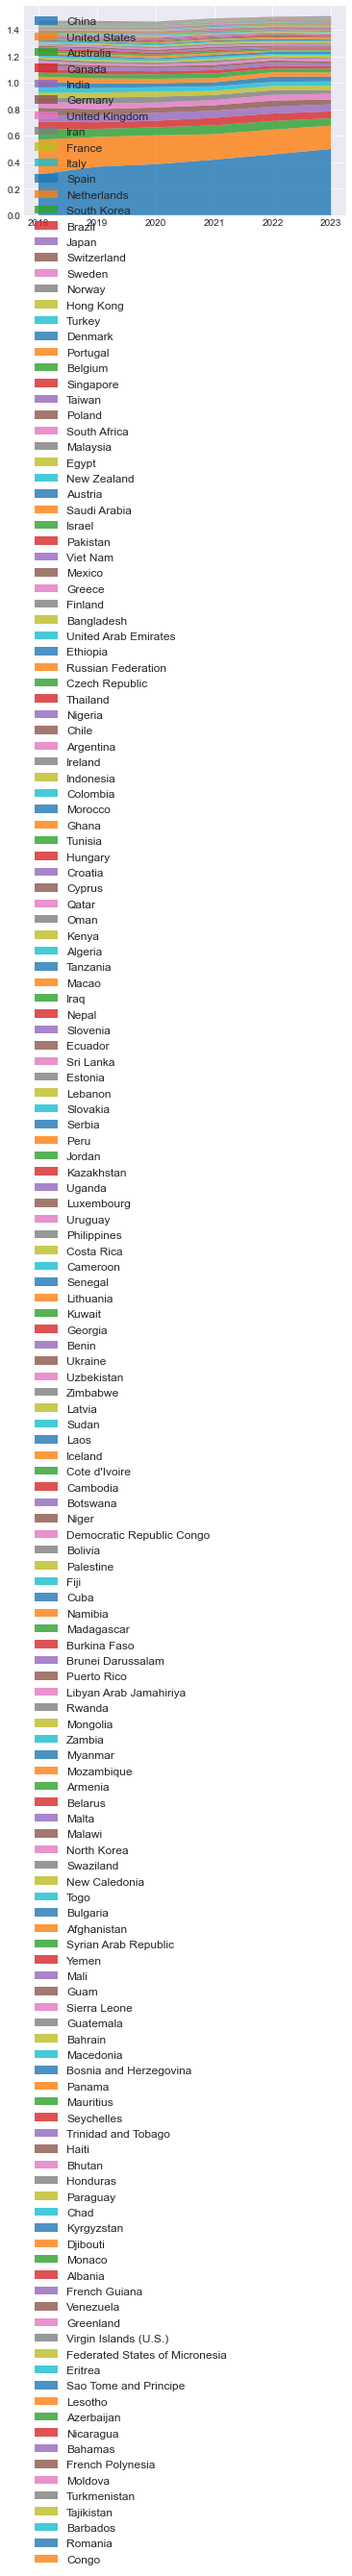

In [29]:
#All individual words
plt.stackplot([int(x + 2018) for x in sorted_pubs.index],
              [sorted_pubs[c] for c in sorted_pubs.columns],
              labels=sorted_pubs.columns.tolist(),
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.show()

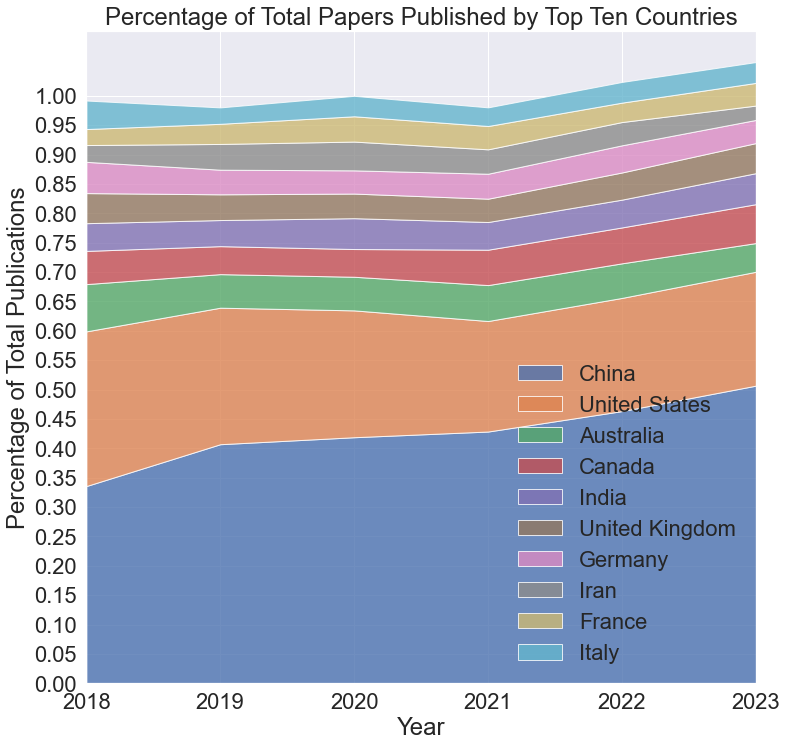

In [140]:
sns.set(font_scale = 2)
plt.figure(figsize = (12,12))
plt.stackplot([int(x + 2018) for x in sorted_pubs.index],
              [sorted_pubs[c] for c in sorted_pubs.iloc[:, : 10]],
              labels=sorted_pubs.columns.tolist()[:10],
              alpha=0.8)
plt.style.use('seaborn-darkgrid')
# plt.gca().invert_yaxis()
plt.title("Percentage of Total Papers Published by Top Ten Countries")

plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(range(2018, 2024))
plt.ylabel("Percentage of Total Publications")
plt.xlabel("Year")

# plt.legend(loc=2, fontsize='large')
# plt.gca().invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')
plt.margins(x=0)
plt.savefig('percent_pubs_t10_countries.png',transparent=True)
plt.show()

In [18]:
"""
Create a 2D area graph that shows how the percentage of each of the topics increases
over time. See Fig 3 from reference for guidance.
"""

'\nCreate a 2D area graph that shows how the percentage of each of the topics increases\nover time. See Fig 3 from reference for guidance.\n'

In [113]:
counts_years = pd.DataFrame(columns = [i for i in range(29)])

In [114]:
#area graph by year 
for i in range(2018, 2024):
    by_year = papers[papers['year']==i]
    
    numbers_by_year = []
    
    for paper_i in by_year.index.tolist():
        
        l = buzz_counts.loc[paper_i].tolist()
        for i in range(len(l)):
            if l[i] !=0:
                l[i] = 1
                
        numbers_by_year.append(l)
#     print(numbers_by_year)
    
    counts_years.loc[len(counts_years.index)] = [sum(x) for x in zip(*numbers_by_year)]

In [115]:
sorted_counts_years = counts_years[counts_years.sum().sort_values(ascending=False).index]



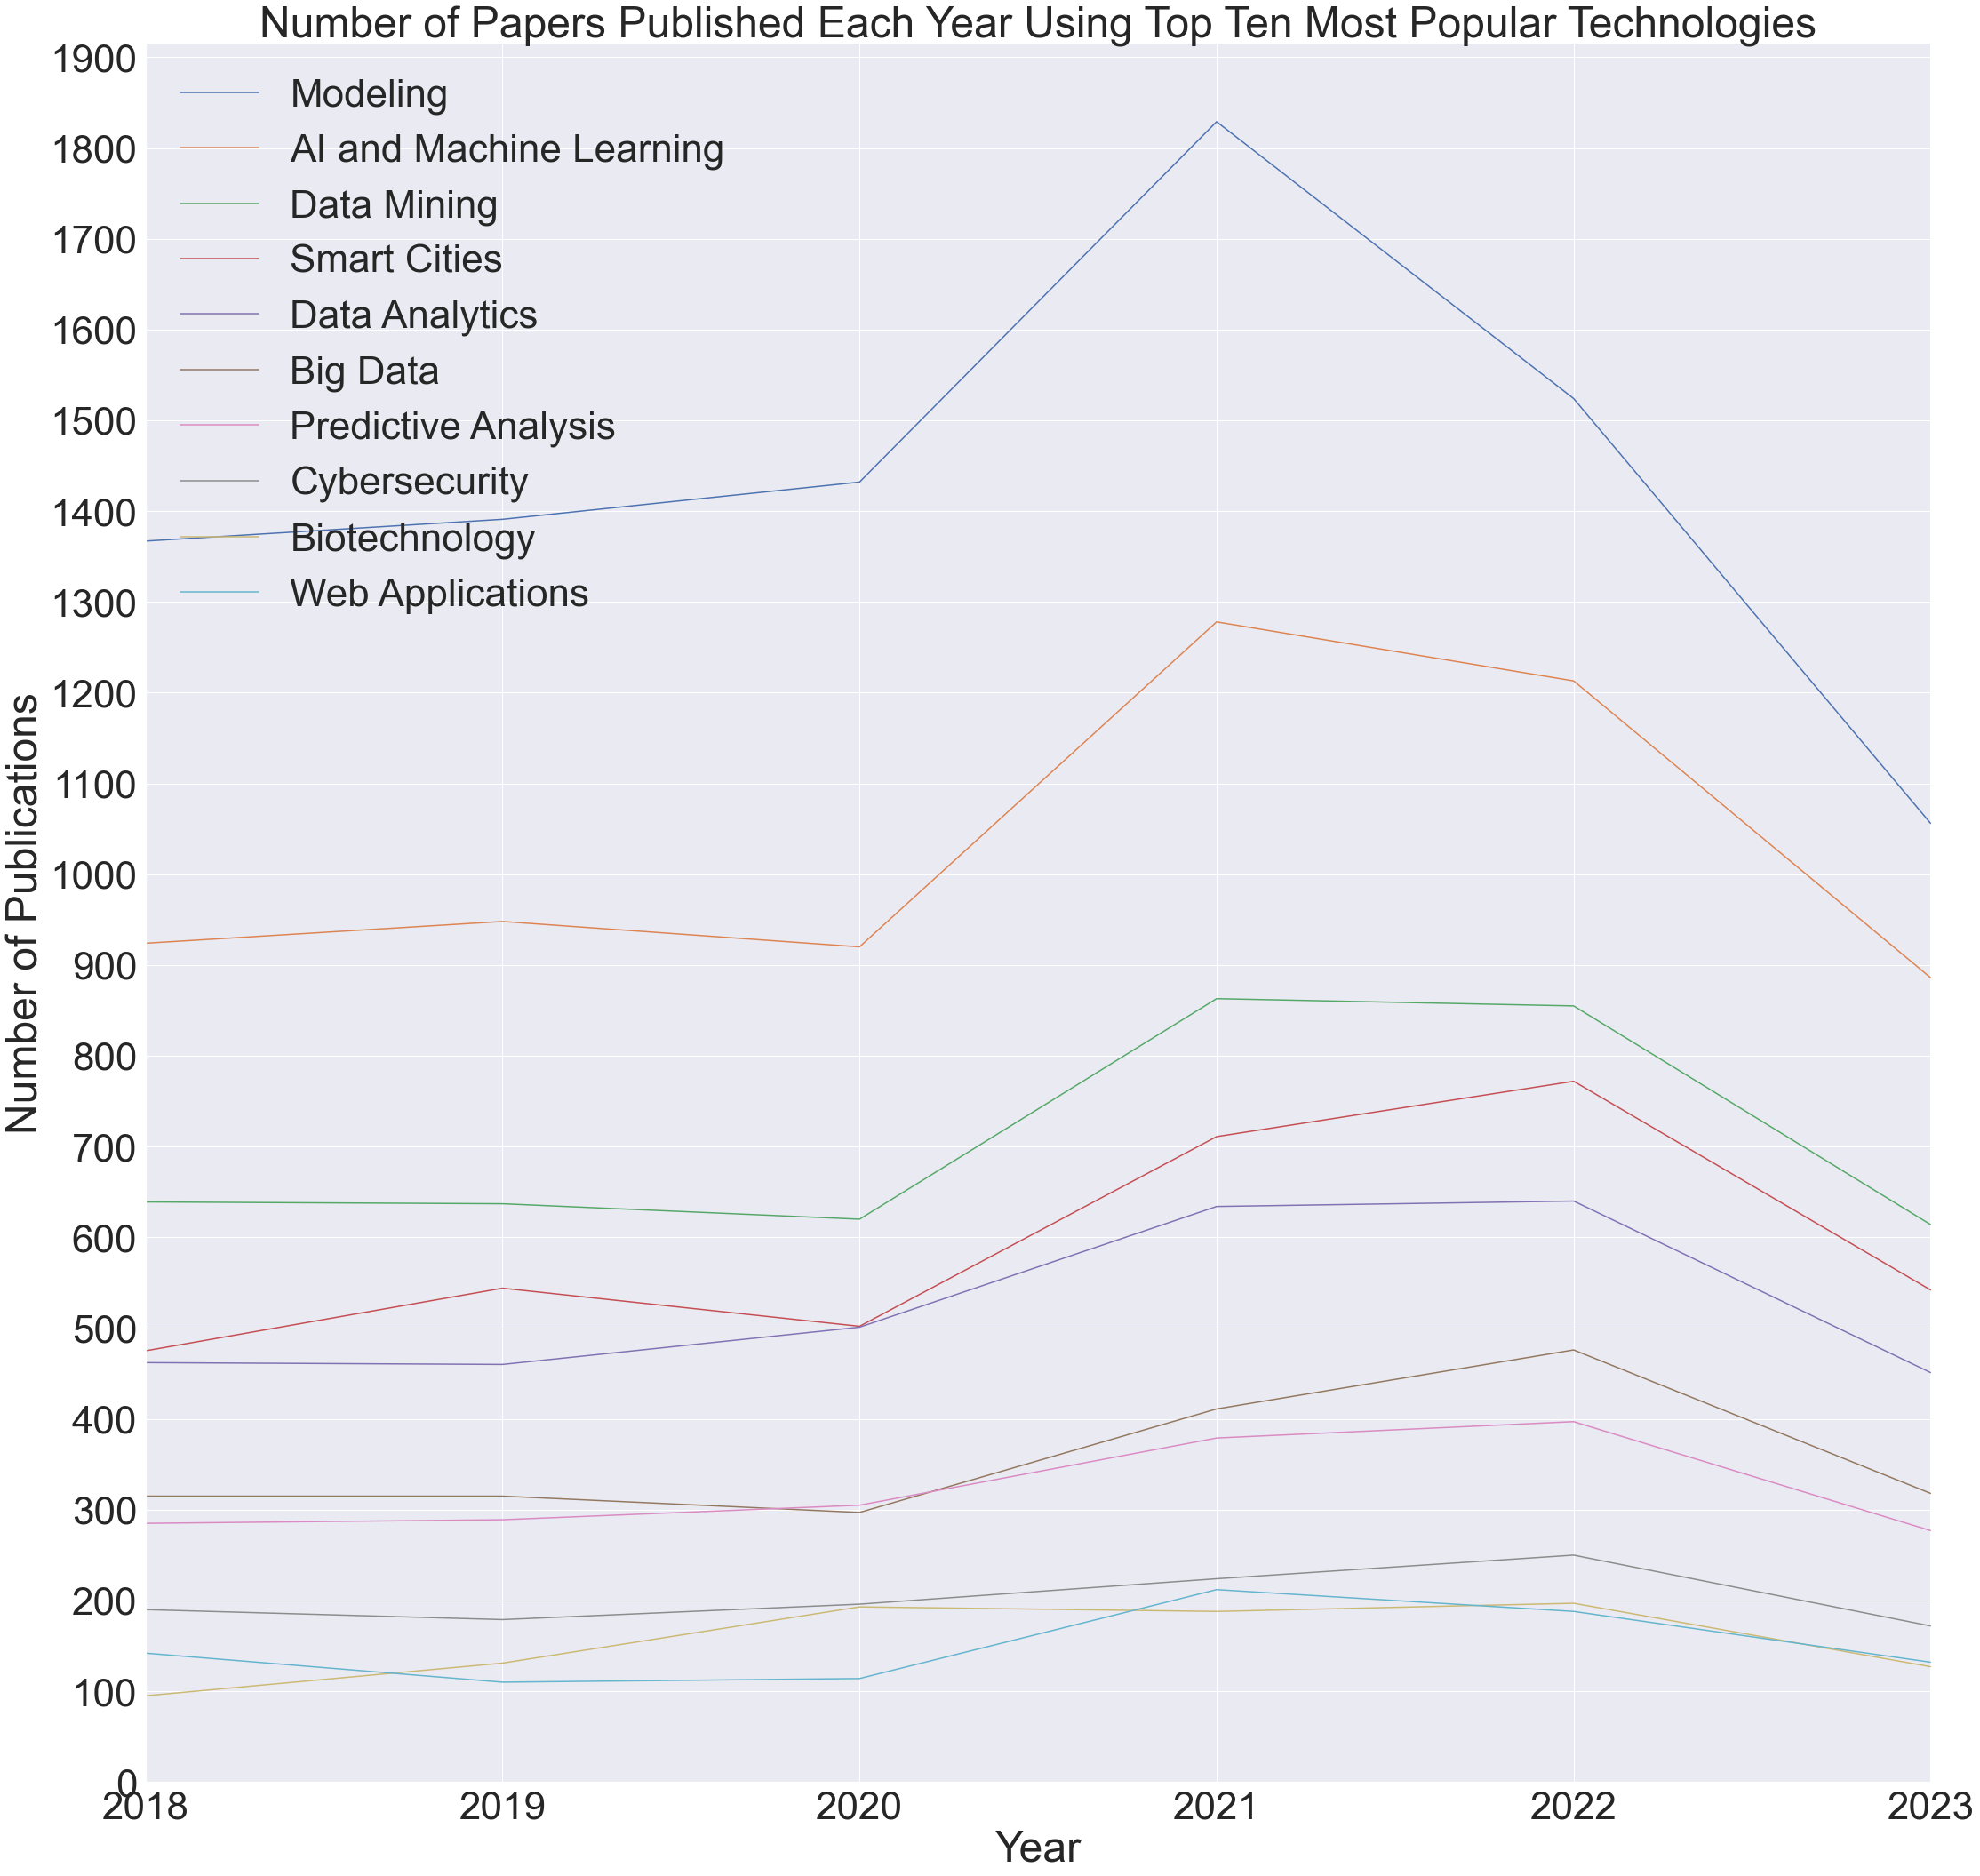

In [145]:
sns.set(font_scale = 4)
plt.figure(figsize = (36,36))

for i in sorted_counts_years.columns[:10]:
    plt.plot(range(2018,2024), sorted_counts_years[i], label = words.iat[i,0])
plt.style.use('seaborn-darkgrid')
plt.title("Number of Papers Published Each Year Using Top Ten Most Popular Technologies")

plt.ylabel("Number of Publications")
plt.xlabel("Year")
# plt.legend(loc=2, fontsize='large')
# plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 2000, 100))
plt.margins(x=0)
plt.legend(loc='upper left')
plt.savefig('topic_trends.png', transparent = True)
plt.show()

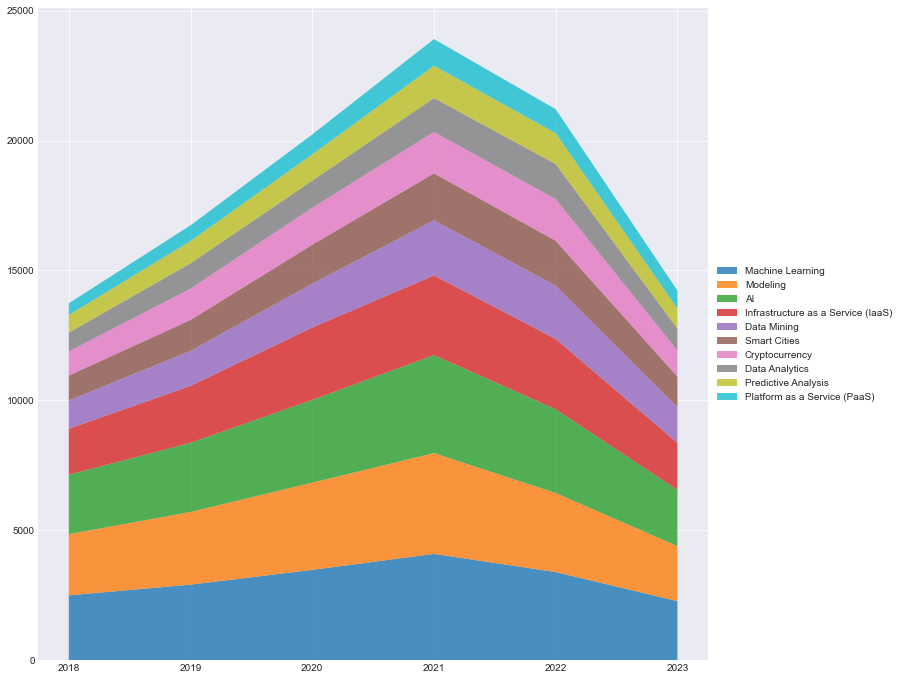

In [268]:
#All individual words GARBAGE
plt.figure(figsize = (12,12))
plt.stackplot([int(x + 2018) for x in counts_years.index],
              [sorted_counts_years[i] for i in sorted_counts_years.iloc[:, : 10]],
              labels=[words.iat[i,0] for i in sorted_counts_years.iloc[:, : 10]],
              alpha=0.8)

plt.legend(loc=2, fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [80]:
buzzwords_in_papers = buzzwords_in_papers.drop(buzzwords_in_papers[buzzwords_in_papers['sub_word']=='dapp'].index.tolist())
                         

In [81]:
buzzwords_in_papers.drop(buzzwords_in_papers[buzzwords_in_papers['category']=='blockchain'].index.tolist())


,paper_id,category,sub_word,buzz_id
0,0,Modeling,modeling,10
1,0,Modeling,modeling,10
2,0,Modeling,modeling,10
3,0,Modeling,modeling,10
4,0,Modeling,modeling,10
...,...,...,...,...
1111686,27399,Infrastructure as a Service (IaaS),databases,37
1111687,27399,Infrastructure as a Service (IaaS),databases,37
1111688,27399,Infrastructure as a Service (IaaS),databases,37
1111689,27399,Infrastructure as a Service (IaaS),databases,37


In [90]:
contexts_papers

,context
0,rated porous media hydrodynamic dispersion inv...
1,ity reaches a maximum value and then decreases...
2,additionally many attempts have been made us...
3,s the effects of grain heterogeneity will aid ...
4,edia at the pore scale there are two commonly...
...,...
1111706,e highly important for modelling of wrrfs are ...
1111707,eviation from the experimental results table 7...
1111708,fig 7 remark that the main precipitate fou...
1111709,improvement of model simulation speed was obta...


In [87]:
set(buzzwords_in_papers[buzzwords_in_papers['category']=='Blockchain']['sub_word'].tolist())


{'blockchain',
 'decentralization',
 'decentralized application',
 'digital asset',
 'dpos',
 'security token',
 'smart contracts',
 'solidity',
 'staking',
 'tokenization',
 'yield farming'}

In [ ]:
#by topic

In [72]:
buzz_counts

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,1,0,0,0,0,0,65,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,8,0,0,0,0,0,9,1,4,0,...,5,5,0,0,0,0,0,0,1,2
26470,2,0,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,1,4
26471,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,6
26472,1,0,0,0,0,0,3,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [161]:
"""
number of buzzwords in each paper
"""

'\nnumber of buzzwords in each paper\n'

In [46]:
occur_per_topic

,count
0,192873
1,9386
2,2496
3,4624
4,453
5,3072
6,253827
7,7878
8,31423
9,7589


In [118]:
#country vs #articles by year
"""Plot number of country of origin (from affiliations) vs number of publications (we might
be able to create a map of the world that shows the percentages"""

countries = {}
for i in set(papers.index.tolist()):
#     print(i)
    aff_list = re.split(':|, ',papers.loc[i]['affiliations'])
    
    try:
        countries_list = [affiliations[affiliations['aff_id'] == int(aff)]['country'].tolist()[0] for aff in aff_list]
    except Exception as e:
#         broken.append(i)
        continue
    
#     print(countries_list)
    for co in set(countries_list):
        if co not in countries.keys():
            countries[co] = [0]*6
        
        countries[co][papers.iat[i,2]-2018] +=1

sorted_countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse = True)}



IndexError: list index out of range

In [5]:
sorted_countries

{'China': [1082, 1542, 1944, 2422, 2259, 1618],
 'United States': [904, 938, 1089, 1092, 904, 561],
 'Australia': [272, 259, 302, 382, 316, 175],
 'Canada': [198, 209, 247, 323, 273, 163],
 'Germany': [192, 196, 198, 238, 226, 117],
 'India': [172, 213, 299, 295, 246, 169],
 'Italy': [164, 151, 163, 200, 142, 102],
 'United Kingdom': [162, 177, 181, 218, 207, 139],
 'France': [136, 152, 193, 174, 155, 114],
 'Netherlands': [132, 161, 167, 175, 165, 102],
 'Spain': [128, 144, 153, 172, 187, 116],
 'South Korea': [102, 128, 171, 203, 132, 93],
 'Iran': [95, 188, 220, 220, 169, 79],
 'Brazil': [87, 122, 115, 142, 108, 54],
 'Japan': [87, 101, 125, 122, 108, 66],
 'Switzerland': [72, 62, 71, 99, 86, 52],
 'Sweden': [65, 55, 63, 96, 74, 55],
 'Norway': [57, 66, 67, 101, 51, 27],
 'Singapore': [53, 69, 64, 53, 41, 26],
 'Taiwan': [48, 52, 52, 70, 54, 37],
 'Turkey': [45, 73, 67, 86, 43, 36],
 'Belgium': [45, 53, 60, 73, 52, 34],
 'Portugal': [42, 55, 78, 82, 38, 25],
 'New Zealand': [42, 41,

In [36]:
x = [i for i in range(2018,2024)]

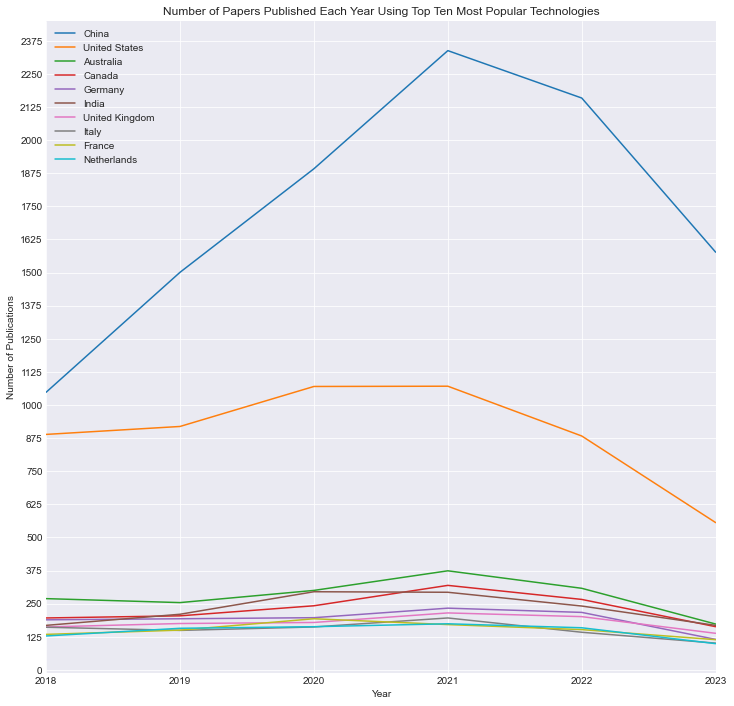

In [37]:
plt.figure(figsize = (12,12))
for p in list(sorted_countries.items())[:10]:
    plt.plot(range(2018, 2024), p[1], label = p[0])

plt.xlabel("Year")
plt.ylabel("Number of publications")
# plt.style.use('seaborn-darkgrid')
plt.title("Number of Papers Published Each Year Using Top Ten Most Popular Technologies")
plt.savefig('papers_countries_per_year.png')
# plt.legend(loc=2, fontsize='large')
plt.ylabel("Number of Publications")
plt.xlabel("Year")
# plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 2500, 125))
plt.margins(x=0)
plt.legend(loc='upper left')
plt.show()

In [38]:
words

,topic,keywords
0,AI and Machine Learning,"[Artificial Intelligence, Machine Learning, Su..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain and Cryptocurrency,"[Blockchain, Cryptocurrency, Bitcoin, Ethereum..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,AR and VR,"[Augmented Reality, Virtual Reality, Mixed Rea..."
5,Cybersecurity,"[Cybersecurity, Ethical Hacking, Intrusion Det..."
6,Automation,"[Automation, Industrial Automation, Home Autom..."
7,Modeling,"[Modeling, Modelling, ArcGIS, HEC-RAS, MIKE, F..."
8,NLP,"[NLP, Natural Language Processing, Sentiment A..."
9,Quantum Computing,"[Quantum Computing, Quantum Algorithm, Quantum..."


In [152]:
j = 0

for i in set(buzzwords_in_papers['paper_id'].tolist()):
    tmp = buzzwords_in_papers[buzzwords_in_papers['paper_id']== i]
    
    words_used = set(tmp['category'].tolist())
    
    if('Machine Learning' in words_used and 'AI' in words_used):
        j+=1
        print(i)
    
print(j)

2
3
4
7
9
10
11
12
13
14
17
18
19
20
21
23
24
25
26
27
29
30
31
32
33
34
35
37
38
40
42
43
44
45
46
47
50
53
54
55
56
57
58
60
64
65
66
67
68
69
71
72
74
75
76
77
78
79
80
84
85
86
87
88
90
92
94
95
96
97
98
100
102
103
107
108
109
110
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
131
132
133
134
135
137
139
140
141
142
143
145
146
147
149
152
153
155
158
159
160
162
163
164
165
167
170
171
172
174
177
178
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
202
203
205
206
207
208
209
210
213
214
215
216
217
218
220
221
222
223
225
226
227
228
229
230
232
233
234
235
236
237
238
239
240
241
246
247
249
250
251
252
254
255
256
257
258
259
260
261
262
263
264
266
267
268
269
270
271
272
276
277
279
281
283
284
286
288
289
290
291
292
293
294
295
297
298
299
300
301
303
304
305
306
309
312
313
314
315
316
317
318
319
320
321
323
324
327
328
330
331
333
334
336
337
338
339
340
341
342
344
347
349
350
351
354
355
356
358
360
361
362
363
364


2785
2786
2787
2788
2789
2790
2791
2792
2795
2796
2797
2798
2799
2800
2801
2803
2805
2806
2807
2808
2809
2810
2812
2814
2815
2817
2818
2819
2822
2823
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2836
2837
2838
2840
2841
2842
2844
2845
2846
2847
2848
2849
2850
2851
2853
2854
2855
2856
2857
2858
2859
2860
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2889
2890
2891
2893
2894
2895
2896
2897
2898
2899
2900
2901
2903
2904
2905
2906
2907
2908
2912
2913
2914
2915
2916
2917
2918
2919
2920
2922
2925
2927
2928
2931
2932
2933
2934
2935
2937
2938
2939
2940
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2954
2955
2956
2957
2958
2959
2960
2961
2963
2966
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2980
2981
2982
2983
2985
2986
2988
2989
2990
2991
2993
2994
2995
2996
2997
2999
3000
3002
3004
3005
3006
3008
3009
3010
3011
3012
3014
3015
3016
3018
3019
3020
3021
3023
3025
3026
3028
3030
3031
3032
3033
3034


KeyboardInterrupt: 

In [48]:
new_i

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,4,0,0,0,0,1,0,15,0,0,...,0,0,0,1,0,0,0,0,0,0
24738,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
24740,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11


In [52]:
pairs = {}

In [34]:
list(new_i.loc[1].to_numpy().nonzero()[0])

[7, 14]

In [53]:
for i in set(new_i.index.tolist()):
#     tmp = buzzwords_in_papers[buzzwords_in_papers['index']== i]
    
    indexes = list(new_i.loc[i].to_numpy().nonzero()[0])
    for j in range(len(indexes)):
        for k in range(j+1, len(indexes)):
            if (indexes[j],indexes[k]) in pairs.keys():
                pairs[(indexes[j],indexes[k])] +=1
            else:
                pairs[(indexes[j],indexes[k])] = 1

In [38]:
pairs

{(0, 1): 8611,
 (0, 2): 6785,
 (0, 3): 4668,
 (1, 2): 6785,
 (1, 3): 4668,
 (2, 3): 4668,
 (0, 4): 2846,
 (0, 5): 1561,
 (0, 6): 810,
 (0, 7): 398,
 (1, 4): 2846,
 (1, 5): 1561,
 (1, 6): 810,
 (1, 7): 398,
 (2, 4): 2846,
 (2, 5): 1561,
 (2, 6): 810,
 (2, 7): 398,
 (3, 4): 2846,
 (3, 5): 1561,
 (3, 6): 810,
 (3, 7): 398,
 (4, 5): 1561,
 (4, 6): 810,
 (4, 7): 398,
 (5, 6): 810,
 (5, 7): 398,
 (6, 7): 398,
 (0, 8): 211,
 (1, 8): 211,
 (2, 8): 211,
 (3, 8): 211,
 (4, 8): 211,
 (5, 8): 211,
 (6, 8): 211,
 (7, 8): 211,
 (0, 9): 109,
 (1, 9): 109,
 (2, 9): 109,
 (3, 9): 109,
 (4, 9): 109,
 (5, 9): 109,
 (6, 9): 109,
 (7, 9): 109,
 (8, 9): 109,
 (0, 10): 56,
 (1, 10): 56,
 (2, 10): 56,
 (3, 10): 56,
 (4, 10): 56,
 (5, 10): 56,
 (6, 10): 56,
 (7, 10): 56,
 (8, 10): 56,
 (9, 10): 56,
 (0, 11): 30,
 (0, 12): 18,
 (1, 11): 30,
 (1, 12): 18,
 (2, 11): 30,
 (2, 12): 18,
 (3, 11): 30,
 (3, 12): 18,
 (4, 11): 30,
 (4, 12): 18,
 (5, 11): 30,
 (5, 12): 18,
 (6, 11): 30,
 (6, 12): 18,
 (7, 11): 30,
 (7, 

In [9]:
dropped

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,22,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,47,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9816,24737,4,0,0,0,0,1,0,15,0,...,0,0,0,1,0,0,0,0,0,0
9817,24738,5,0,0,0,0,0,0,31,0,...,0,0,0,5,0,0,0,0,0,1
9818,24740,0,0,0,0,0,3,0,18,0,...,3,0,0,0,0,0,0,0,0,11
9819,24741,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
new_i = dropped.set_index('Unnamed: 0')

In [12]:
new_i

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,47,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,4,0,0,0,0,1,0,15,0,0,...,0,0,0,1,0,0,0,0,0,0
24738,5,0,0,0,0,0,0,31,0,0,...,0,0,0,5,0,0,0,0,0,1
24740,0,0,0,0,0,3,0,18,0,0,...,3,0,0,0,0,0,0,0,0,11


In [15]:
papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/papers/final_valid_papers.csv')

In [16]:
papers

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
2,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104476,2023-08-01,S0309170823001112,2-s2.0-85161667219,8.516167e+10,0.0,25822520800,60025063,True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.020,2018-01-01,S1364815217304140,2-s2.0-85032268729,8.503227e+10,142.0,"34571084000, 55188785600, 33767605600, 5721638...","60016437:60012197:60012197:60012197, 60025278:...",True
26470,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.010,2018-01-01,S1364815216304005,2-s2.0-85032353211,8.503235e+10,54.0,"37111876100, 15069126500, 57189996027, 3574567...","60013141:60025182:60025182:60025182:60013141, ...",True
26471,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.08.002,2018-01-01,S1364815216309550,2-s2.0-85032684995,8.503268e+10,5.0,"7006615627, 49661600900, 15132591800, 66033150...","60021439:60030486, 109682148:60021439:60021439...",True
26472,28,68,2018,https://www.sciencedirect.com/science/article/...,10.1016/j.envsoft.2017.09.011,2018-01-01,S136481521630843X,2-s2.0-85032736133,8.503274e+10,45.0,"56111768300, 37010006200, 43361846100, 5611302...",60068861:60020071:60068861:60024695:60102538:6...,True


In [17]:
c_papers = pd.read_csv(os.getcwd().replace('scripts', 'data') + '/corpus_papers.csv')

In [20]:
c_i = c_papers.set_index("Unnamed: 0")

In [21]:
c_i

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
Unnamed: 0,,,,,,,,,,,,,
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
5,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104441,2023-08-01,S0309170823000763,2-s2.0-85161836812,8.516184e+10,0.0,"57886962200, 36559092800",60010065:60010065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109280,2020-11-15,S0304380020303501,2-s2.0-85090927013,8.509093e+10,3.0,"23024388700, 7101905813, 35361990500, 66029039...",60017028:60113653:125122077:60084653:60000961,True
24738,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109286,2020-11-15,S0304380020303562,2-s2.0-85090881697,8.509088e+10,7.0,"57205669891, 35721643400, 36972298000, 3533988...",60050715:60050715:60050715:60050715,True
24740,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109295,2020-11-15,S0304380020303653,2-s2.0-85091224515,8.509122e+10,4.0,"37032101300, 57219093332, 56024528100, 7003432534",60019762:60019839:60019839:60019839,True


In [22]:
papers_step3 = c_i.loc[new_i.index.tolist()]

In [23]:
papers_step3

,journal_id,volume_id,year,link,doi,date,pii,eid,scopus_id,citations,authors,affiliations,open_access
Unnamed: 0,,,,,,,,,,,,,
0,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104474,2023-08-01,S0309170823001094,2-s2.0-85161258968,8.516126e+10,0.0,"58307014400, 36008901600, 26635952600",60031268:60031268:60007989,True
1,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104475,2023-08-01,S0309170823001100,2-s2.0-85161636300,8.516164e+10,0.0,"53984251100, 35610240400","60104134:60104134, 60022461",True
3,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104477,2023-08-01,S0309170823001124,2-s2.0-85161661769,8.516166e+10,0.0,"57210424267, 36160282300, 7404296426",60018394:60018394:60018394,True
4,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104485,2023-08-01,S0309170823001203,2-s2.0-85161678744,8.516168e+10,0.0,"56708113100, 7202660185",60030447:60007566,True
5,1,0,2023,https://www.sciencedirect.com/science/article/...,10.1016/j.advwatres.2023.104441,2023-08-01,S0309170823000763,2-s2.0-85161836812,8.516184e+10,0.0,"57886962200, 36559092800",60010065:60010065,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24737,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109280,2020-11-15,S0304380020303501,2-s2.0-85090927013,8.509093e+10,3.0,"23024388700, 7101905813, 35361990500, 66029039...",60017028:60113653:125122077:60084653:60000961,True
24738,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109286,2020-11-15,S0304380020303562,2-s2.0-85090881697,8.509088e+10,7.0,"57205669891, 35721643400, 36972298000, 3533988...",60050715:60050715:60050715:60050715,True
24740,27,47,2020,https://www.sciencedirect.com/science/article/...,10.1016/j.ecolmodel.2020.109295,2020-11-15,S0304380020303653,2-s2.0-85091224515,8.509122e+10,4.0,"37032101300, 57219093332, 56024528100, 7003432534",60019762:60019839:60019839:60019839,True


In [54]:
pair_df = pd.DataFrame(columns = range(29))

for i in range(29):
    pair_df.loc[len(pair_df.index)] = [0]*29
    

In [55]:
vals = set()

for k,v in pairs.items():
    vals.add(k[0])
    vals.add(k[1])

In [56]:
for k,v in pairs.items():
    pair_df.iat[k[0], k[1]] = v/papers.shape[0]
    pair_df.iat[k[1], k[0]] = v/papers.shape[0]

In [188]:
pair_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.121969,0.020888,0.045781,0.002757,0.041097,0.647352,0.066820,0.177948,0.075017,...,0.089106,0.216250,0.026857,0.000038,0.059983,0.002909,0.018244,0.020700,0.142555,0.355368
1,0.121969,0.000000,0.005666,0.022022,0.001398,0.010236,0.129486,0.018358,0.041286,0.022324,...,0.032409,0.060134,0.008688,0.000000,0.031956,0.001889,0.018886,0.025346,0.057339,0.094999
2,0.020888,0.005666,0.000000,0.003173,0.000189,0.002531,0.023457,0.003173,0.011823,0.004193,...,0.003702,0.012541,0.001360,0.000000,0.002682,0.000189,0.001398,0.001247,0.006119,0.017867
3,0.045781,0.022022,0.003173,0.000000,0.000642,0.006157,0.049445,0.008801,0.021719,0.015336,...,0.012012,0.060286,0.003777,0.000038,0.008159,0.001095,0.009443,0.007403,0.026479,0.042079
4,0.002757,0.001398,0.000189,0.000642,0.000000,0.001398,0.002795,0.000453,0.000944,0.001020,...,0.000642,0.001549,0.000264,0.000000,0.000604,0.000227,0.000264,0.000529,0.001586,0.002191
5,0.041097,0.010236,0.002531,0.006157,0.001398,0.000000,0.044157,0.006610,0.018509,0.007743,...,0.008726,0.020322,0.002644,0.000000,0.005553,0.000264,0.002946,0.003135,0.012125,0.034222
6,0.647352,0.129486,0.023457,0.049445,0.002795,0.044157,0.000000,0.070975,0.190715,0.081401,...,0.094583,0.231926,0.028632,0.000038,0.062439,0.003211,0.020851,0.023608,0.147428,0.382262
7,0.066820,0.018358,0.003173,0.008801,0.000453,0.006610,0.070975,0.000000,0.024703,0.010576,...,0.017867,0.033656,0.013183,0.000000,0.010992,0.000869,0.003664,0.004986,0.024779,0.056131
8,0.177948,0.041286,0.011823,0.021719,0.000944,0.018509,0.190715,0.024703,0.000000,0.021455,...,0.037320,0.095943,0.009179,0.000038,0.023306,0.001284,0.009103,0.010388,0.043628,0.160006
9,0.075017,0.022324,0.004193,0.015336,0.001020,0.007743,0.081401,0.010576,0.021455,0.000000,...,0.014543,0.034373,0.003928,0.000000,0.008650,0.000982,0.005590,0.005288,0.033278,0.065423


In [205]:
tri_pair = np.triu(pair_df)

In [209]:
mask = np.triu(np.ones_like(pair_df, dtype=bool))
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=38, center="light", as_cmap=True)

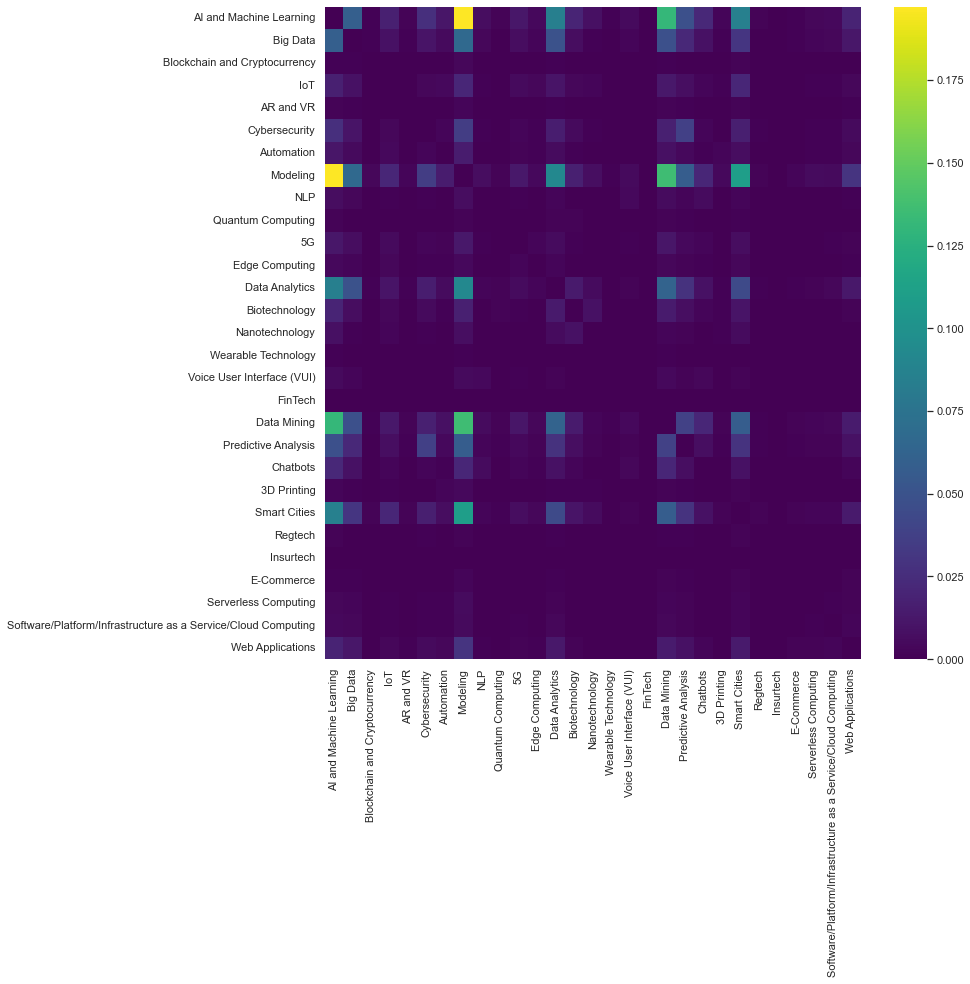

In [58]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1)
sns.heatmap(pair_df, cmap="viridis", xticklabels = words['topic'].tolist(), yticklabels = words['topic'].tolist())
fig.savefig("heatmap_topics.png", transparent = True)

In [215]:
words

,topic,keywords
0,AI,"[Reinforcement Learning, Supervised Learning, ..."
1,Big Data,"[Hadoop, NoSQL, Apache Flink, Apache Kafka, Bi..."
2,Blockchain,"[Blockchain, Ethereum, Smart Contracts, Decent..."
3,IoT,"[Smart Medical Device, Industrial IoT, Home Au..."
4,VR,"[Virtual Reality, Immersive Gaming, Virtual To..."
5,AR,"[Google Glass, Microsoft HoloLens, AR in Marke..."
6,Machine Learning,"[Machine Learning, Scikit-Learn, TensorFlow, P..."
7,Cybersecurity,"[Cybersecurity, Ethical Hacking, Intrusion Det..."
8,Cryptocurrency,"[Cryptocurrency, Bitcoin, Ethereum, Litecoin, ..."
9,Automation,"[Automation, Industrial Automation, Home Autom..."
